In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/WPI/CV/Final_project/keypoint.csv'
model_save_path = '/content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.hdf5'

# 分類数設定

In [ ]:
NUM_CLASSES = 10

# 学習データ読み込み

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
54/62 [=========================>....] - ETA: 0s - loss: 2.2769 - accuracy: 0.1416
Epoch 1: saving model to /content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - 4s 21ms/step - loss: 2.2684 - accuracy: 0.1446 - val_loss: 2.1510 - val_accuracy: 0.2353
Epoch 2/1000
52/62 [========================>.....] - ETA: 0s - loss: 2.1281 - accuracy: 0.2162
Epoch 2: saving model to /content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.hdf5
62/62 [==============================] - 0s 6ms/step - loss: 2.1150 - accuracy: 0.2216 - val_loss: 1.9669 - val_accuracy: 0.3184
Epoch 3/1000
52/62 [========================>.....] - ETA: 0s - loss: 1.9977 - accuracy: 0.2548
Epoch 3: saving model to /content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.hdf5
62/62 [==============================] - 0s 6ms/step - loss: 1.9853 - accuracy: 0.2597 - val_loss: 1.7974 - val_accuracy: 0.3941
Epoch 4/1000
57/62 [==========================>...] - ETA: 0s - loss: 1.8434 - accuracy: 0.3136
Epoch 4: saving model to /content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.hdf5
62/62 [==============================] - 0

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8595


In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 99ms/step
[7.9865104e-01 3.2539837e-02 4.7479516e-05 3.2049714e-04 2.7668351e-10
 7.4132538e-04 4.1893988e-12 1.6723666e-01 3.3198208e-11 4.6315545e-04]
0


# 混同行列

83/83 [==============================] - 0s 2ms/step


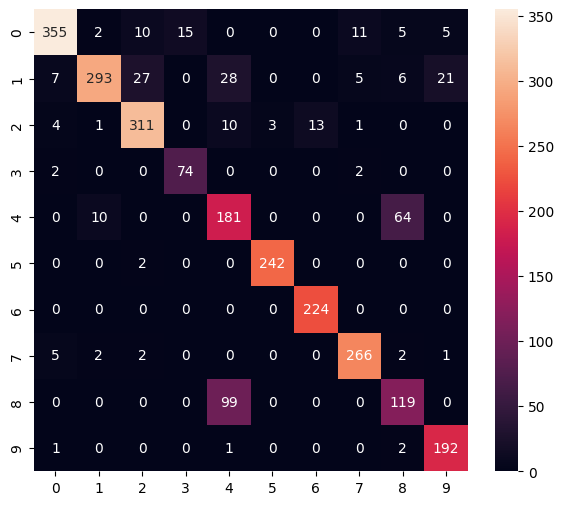

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       403
           1       0.95      0.76      0.84       387
           2       0.88      0.91      0.89       343
           3       0.83      0.95      0.89        78
           4       0.57      0.71      0.63       255
           5       0.99      0.99      0.99       244
           6       0.95      1.00      0.97       224
           7       0.93      0.96      0.94       278
           8       0.60      0.55      0.57       218
           9       0.88      0.98      0.93       196

    accuracy                           0.86      2626
   macro avg       0.85      0.87      0.86      2626
weighted avg       0.87      0.86      0.86      2626



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# モデルを変換(量子化)'/content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.tflite'
tflite_save_path = '/content/drive/MyDrive/WPI/CV/Final_project/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6808

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 44 µs, sys: 4 µs, total: 48 µs
Wall time: 52.2 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.9865098e-01 3.2539845e-02 4.7479512e-05 3.2049679e-04 2.7668298e-10
 7.4132392e-04 4.1893819e-12 1.6723670e-01 3.3198201e-11 4.6315536e-04]
0
